In [2]:
import pandas as pd
book=pd.read_csv("book.csv")
book

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1995,0,0,1,0,0,1,1,1,0,1,1
1996,0,0,0,0,0,0,0,0,0,0,0
1997,0,0,0,0,0,0,0,0,0,0,0
1998,0,0,1,0,0,0,0,0,0,0,0


In [3]:
book.isnull().sum()

ChildBks     0
YouthBks     0
CookBks      0
DoItYBks     0
RefBks       0
ArtBks       0
GeogBks      0
ItalCook     0
ItalAtlas    0
ItalArt      0
Florence     0
dtype: int64

In [4]:
X=book
X

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1995,0,0,1,0,0,1,1,1,0,1,1
1996,0,0,0,0,0,0,0,0,0,0,0
1997,0,0,0,0,0,0,0,0,0,0,0
1998,0,0,1,0,0,0,0,0,0,0,0


In [5]:
!pip install mlxtend

In [6]:
from mlxtend.frequent_patterns import apriori,association_rules
frequent_itemsets=apriori(X,min_support=0.010,max_len=3,use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
...,...,...
203,0.0150,"(GeogBks, ItalCook, ItalAtlas)"
204,0.0240,"(GeogBks, ItalArt, ItalCook)"
205,0.0130,"(GeogBks, ItalCook, Florence)"
206,0.0115,"(GeogBks, ItalArt, ItalAtlas)"


In [7]:
frequent_itemsets.sort_values('support',ascending = False,inplace=True)
frequent_itemsets.sort_values

<bound method DataFrame.sort_values of      support                        itemsets
2     0.4310                       (CookBks)
0     0.4230                      (ChildBks)
3     0.2820                      (DoItYBks)
6     0.2760                       (GeogBks)
12    0.2560             (ChildBks, CookBks)
..       ...                             ...
170   0.0110     (DoItYBks, ItalArt, RefBks)
165   0.0105    (ItalArt, Florence, CookBks)
108   0.0105   (ItalArt, Florence, ChildBks)
134   0.0100  (GeogBks, YouthBks, ItalAtlas)
174   0.0100   (DoItYBks, ArtBks, ItalAtlas)

[208 rows x 2 columns]>

In [8]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules.head(20)
rules.sort_values('lift',ascending = False).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
763,"(ItalArt, RefBks)",(ItalAtlas),0.0200,0.0370,0.0165,0.825000,22.297297,0.015760,5.502857
766,(ItalAtlas),"(ItalArt, RefBks)",0.0370,0.0200,0.0165,0.445946,22.297297,0.015760,1.768780
753,(ItalArt),"(ArtBks, ItalAtlas)",0.0485,0.0180,0.0165,0.340206,18.900344,0.015627,1.488344
752,"(ArtBks, ItalAtlas)",(ItalArt),0.0180,0.0485,0.0165,0.916667,18.900344,0.015627,11.418000
355,(ItalArt),"(ItalCook, ArtBks)",0.0485,0.0565,0.0375,0.773196,13.684883,0.034760,4.159977
354,"(ItalCook, ArtBks)",(ItalArt),0.0565,0.0485,0.0375,0.663717,13.684883,0.034760,2.829461
561,"(ItalCook, RefBks)",(ItalAtlas),0.0465,0.0370,0.0230,0.494624,13.368207,0.021279,1.905511
564,(ItalAtlas),"(ItalCook, RefBks)",0.0370,0.0465,0.0230,0.621622,13.368207,0.021279,2.519964
924,(ItalArt),"(GeogBks, ItalAtlas)",0.0485,0.0205,0.0115,0.237113,11.566507,0.010506,1.283939
921,"(GeogBks, ItalAtlas)",(ItalArt),0.0205,0.0485,0.0115,0.560976,11.566507,0.010506,2.167306


In [9]:
from mlxtend.frequent_patterns import apriori,association_rules #there is a change in support and max_length
frequent_itemsets=apriori(X,min_support=0.005,max_len=2,use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
...,...,...
61,0.0375,"(ItalArt, ItalCook)"
62,0.0175,"(ItalCook, Florence)"
63,0.0165,"(ItalArt, ItalAtlas)"
64,0.0065,"(ItalAtlas, Florence)"


In [10]:
frequent_itemsets.sort_values('support',ascending = True,inplace=True)
frequent_itemsets.sort_values

<bound method DataFrame.sort_values of     support               itemsets
64   0.0065  (ItalAtlas, Florence)
65   0.0125    (ItalArt, Florence)
63   0.0165   (ItalArt, ItalAtlas)
62   0.0175   (ItalCook, Florence)
27   0.0175  (YouthBks, ItalAtlas)
..      ...                    ...
12   0.2560    (ChildBks, CookBks)
6    0.2760              (GeogBks)
3    0.2820             (DoItYBks)
0    0.4230             (ChildBks)
2    0.4310              (CookBks)

[66 rows x 2 columns]>

In [11]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules.head(20)
rules.sort_values('lift',ascending = False).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
4,(ItalArt),(ItalAtlas),0.0485,0.0370,0.0165,0.340206,9.194762,0.014706,1.459547
5,(ItalAtlas),(ItalArt),0.0370,0.0485,0.0165,0.445946,9.194762,0.014706,1.717341
39,(ItalCook),(ItalArt),0.1135,0.0485,0.0375,0.330396,6.812298,0.031995,1.420990
38,(ItalArt),(ItalCook),0.0485,0.1135,0.0375,0.773196,6.812298,0.031995,3.908659
19,(ItalAtlas),(ItalCook),0.0370,0.1135,0.0230,0.621622,5.476842,0.018800,2.342893
18,(ItalCook),(ItalAtlas),0.1135,0.0370,0.0230,0.202643,5.476842,0.018800,1.207740
37,(RefBks),(ItalAtlas),0.2145,0.0370,0.0370,0.172494,4.662005,0.029063,1.163738
36,(ItalAtlas),(RefBks),0.0370,0.2145,0.0370,1.000000,4.662005,0.029063,inf
51,(ArtBks),(ItalArt),0.2410,0.0485,0.0485,0.201245,4.149378,0.036812,1.191229
50,(ItalArt),(ArtBks),0.0485,0.2410,0.0485,1.000000,4.149378,0.036812,inf


In [12]:
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ItalAtlas),(Florence),0.0370,0.1085,0.0065,0.175676,1.619131,0.002485,1.081492
1,(Florence),(ItalAtlas),0.1085,0.0370,0.0065,0.059908,1.619131,0.002485,1.024368
2,(ItalArt),(Florence),0.0485,0.1085,0.0125,0.257732,2.375410,0.007238,1.201049
3,(Florence),(ItalArt),0.1085,0.0485,0.0125,0.115207,2.375410,0.007238,1.075393
4,(ItalArt),(ItalAtlas),0.0485,0.0370,0.0165,0.340206,9.194762,0.014706,1.459547
...,...,...,...,...,...,...,...,...,...
103,(CookBks),(GeogBks),0.4310,0.2760,0.1925,0.446636,1.618245,0.073544,1.308361
104,(GeogBks),(ChildBks),0.2760,0.4230,0.1950,0.706522,1.670264,0.078252,1.966074
105,(ChildBks),(GeogBks),0.4230,0.2760,0.1950,0.460993,1.670264,0.078252,1.343211
106,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240


(array([32., 22.,  8., 10., 12.,  6.,  8.,  8.,  0.,  2.]),
 array([0.0065 , 0.03145, 0.0564 , 0.08135, 0.1063 , 0.13125, 0.1562 ,
        0.18115, 0.2061 , 0.23105, 0.256  ]),
 <a list of 10 Patch objects>)

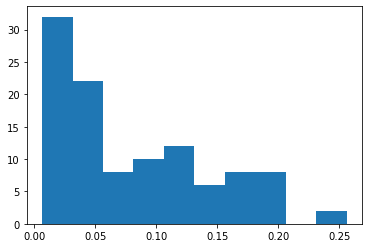

In [13]:
import matplotlib.pyplot as plt
plt.hist(rules.support)

(array([18., 14.,  6., 19., 25.,  7., 10.,  5.,  1.,  3.]),
 array([0.05990783, 0.15391705, 0.24792627, 0.34193548, 0.4359447 ,
        0.52995392, 0.62396313, 0.71797235, 0.81198157, 0.90599078,
        1.        ]),
 <a list of 10 Patch objects>)

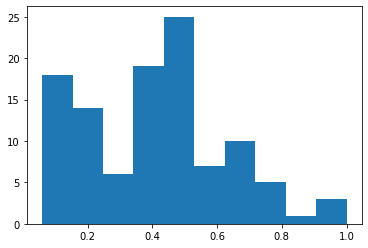

In [14]:
plt.hist(rules.confidence)